Link Repository : https://github.com/asaviraazzahra/Multimedia-Worksheet-New.git

# Tugas Analisis Multimedia: **Image (Citra Digital)**

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:** Asavira Azzahra
**NIM:** 122140067 

---

## Deskripsi Tugas

Tugas ini bertujuan untuk memahami **representasi dasar data citra digital (image)** melalui praktik langsung memuat data, visualisasi komponen warna, serta melakukan analisis spasial sederhana menggunakan berbagai teknik dasar pengolahan citra.

Anda akan bekerja dengan satu atau beberapa gambar (foto diri, objek, atau lingkungan sekitar) untuk:

* Mengamati struktur data piksel dan channel warna (RGB, Grayscale, HSV, dsb.)
* Menganalisis perbedaan hasil visualisasi antar representasi warna
* Melakukan eksplorasi sederhana terhadap transformasi citra (cropping, filtering, edge detection, dll.)
* Menyimpulkan pengaruh setiap tahap pemrosesan terhadap persepsi visual

Fokus tugas ini adalah pada **pemahaman konsep representasi spasial citra digital** dan **interpretasi hasil visualisasi**, **bukan** pada manipulasi kompleks atau penerapan model pembelajaran mesin.

### **Soal 1 — Cropping dan Konversi Warna**

* Ambil sebuah gambar diri Anda (*selfie*) menggunakan kamera atau smartphone.
* Lakukan **cropping secara manual** untuk menghasilkan dua potongan:

  * Cropping **kotak persegi pada area wajah**.
  * Cropping **persegi panjang pada area latar belakang**.
* Resize hasil crop menjadi **920×920 piksel**.
* Konversi gambar menjadi **grayscale** dan **HSV**, lalu tampilkan ketiganya berdampingan.
* Tambahkan **anotasi teks** berisi nama Anda di atas kepala pada gambar hasil crop.

  * Gaya teks (font, warna, posisi, ukuran, ketebalan) **dibebaskan**.
* Jelaskan efek **cropping** dan **perubahan warna** menggunakan **Markdown**.


1. Membaca Gambar Selfie dan Melakukan Cropping

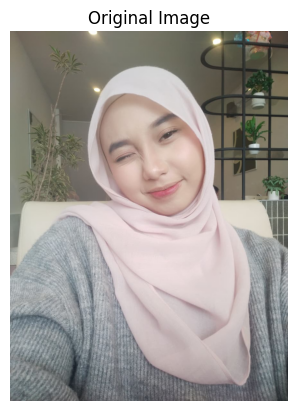

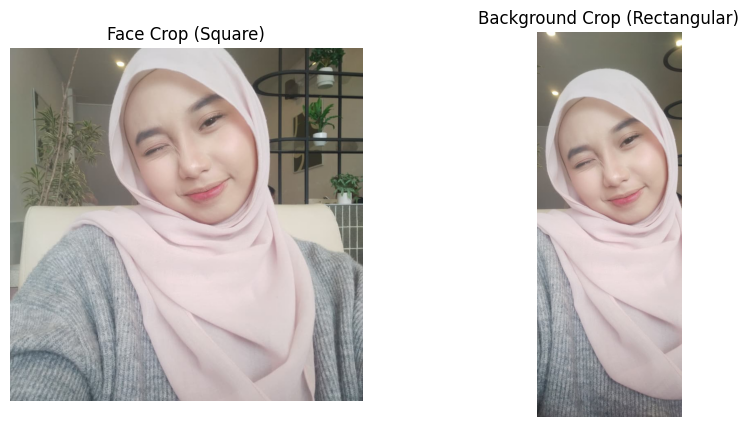

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Membaca gambar selfie dari path yang benar
img = cv2.imread('assets_ws4/selfie1.jpg') 
height, width = img.shape[:2]  
# Menampilkan gambar asli untuk referensi
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

# Melakukan cropping kotak persegi pada area wajah
height, width, _ = img.shape
face_crop_size = min(height, width)  # Ukuran kotak persegi
face_crop = img[(height//2 - face_crop_size//2):(height//2 + face_crop_size//2),
                (width//2 - face_crop_size//2):(width//2 + face_crop_size//2)]

# Melakukan cropping persegi panjang pada area latar belakang
bg_crop = img[0:height, width//4:3*width//4]  # Mengambil bagian tengah dengan aspek rasio persegi panjang

# Menampilkan hasil crop
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(face_crop, cv2.COLOR_BGR2RGB))
axes[0].set_title('Face Crop (Square)')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(bg_crop, cv2.COLOR_BGR2RGB))
axes[1].set_title('Background Crop (Rectangular)')
axes[1].axis('off')

plt.show()

2. Resize dan Konversi Gambar ke Grayscale dan HSV

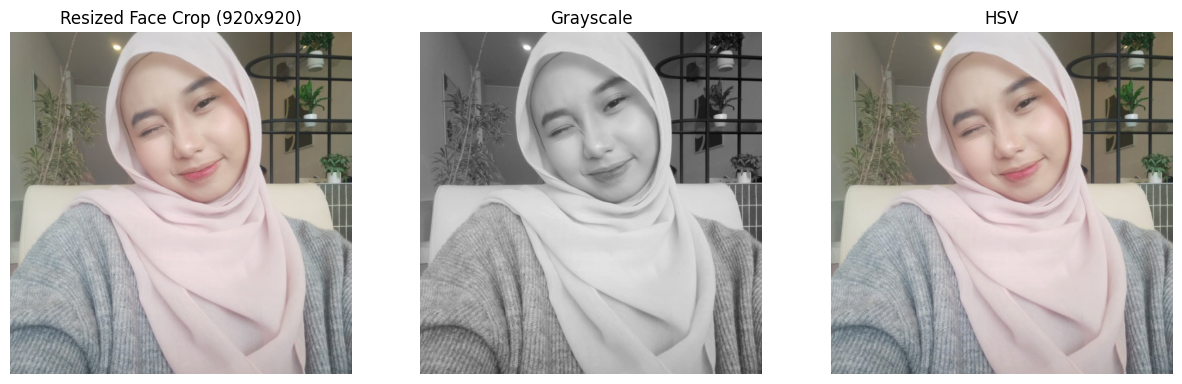

In [2]:
# Resize kedua gambar menjadi 920x920 piksel
face_crop_resized = cv2.resize(face_crop, (920, 920))
bg_crop_resized = cv2.resize(bg_crop, (920, 920))

# Mengkonversi gambar ke grayscale dan HSV
face_grayscale = cv2.cvtColor(face_crop_resized, cv2.COLOR_BGR2GRAY)
face_hsv = cv2.cvtColor(face_crop_resized, cv2.COLOR_BGR2HSV)

# Menampilkan gambar hasil resize dan konversi warna
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Menampilkan gambar crop yang sudah di-resize
axes[0].imshow(cv2.cvtColor(face_crop_resized, cv2.COLOR_BGR2RGB))
axes[0].set_title('Resized Face Crop (920x920)')
axes[0].axis('off')

# Menampilkan gambar grayscale
axes[1].imshow(face_grayscale, cmap='gray')
axes[1].set_title('Grayscale')
axes[1].axis('off')

# Menampilkan gambar HSV
axes[2].imshow(cv2.cvtColor(face_hsv, cv2.COLOR_HSV2RGB))
axes[2].set_title('HSV')
axes[2].axis('off')

plt.show()


3. Menambahkan Anotasi Teks

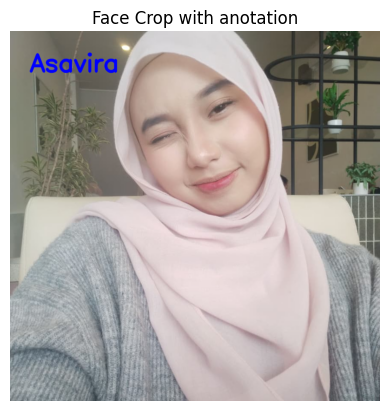

In [3]:
import cv2
import matplotlib.pyplot as plt

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(face_crop_resized, 'Asavira', (50, 100), font, 2, (255, 0, 0), 5, cv2.LINE_AA)

# Menampilkan gambar dengan teks
plt.imshow(cv2.cvtColor(face_crop_resized, cv2.COLOR_BGR2RGB))
plt.title('Face Crop with anotation')
plt.axis('off')
plt.show()


4. Menampilkan semua hasil Menampilkan gambar hasil crop yang sudah dipotong, diberi anotasi, serta gambar hasil resize, grayscale, dan HSV dalam satu tampilan.

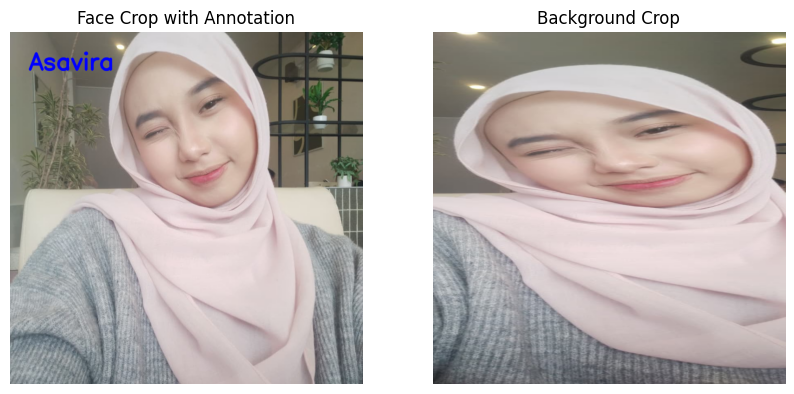

In [4]:
# Menampilkan gambar hasil crop dengan anotasi teks di atas kepala
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Menampilkan gambar crop yang sudah di-resize dengan anotasi
axes[0].imshow(cv2.cvtColor(face_crop_resized, cv2.COLOR_BGR2RGB))
axes[0].set_title('Face Crop with Annotation')
axes[0].axis('off')

# Menampilkan gambar latar belakang crop (persegi panjang)
axes[1].imshow(cv2.cvtColor(bg_crop_resized, cv2.COLOR_BGR2RGB))
axes[1].set_title('Background Crop')
axes[1].axis('off')

plt.show()

### **Soal 2 — Manipulasi Channel Warna RGB**

* Gunakan gambar hasil crop dari Soal 1.
* Konversikan gambar ke ruang warna **RGB**.
* Lakukan manipulasi channel warna dengan cara:

  * **Naikkan intensitas channel merah sebanyak 50 poin** (maksimum 255).
  * **Turunkan intensitas channel biru sebanyak 30 poin** (minimum 0).
* Teknik atau cara menaikkan/menurunkan intensitas **dibebaskan**, asalkan logis dan hasilnya terlihat.
* Gabungkan kembali channel warna dan **simpan gambar hasil modifikasi dalam format `.png`**.
* **Tampilkan histogram per channel (R, G, B)** untuk gambar asli dan hasil modifikasi menggunakan `matplotlib.pyplot.hist`.
* Jelaskan dampak perubahan RGB pada warna gambar dalam sel **Markdown**.


### Implementasi Soal 2 — Manipulasi Channel Warna RGB

#### 1. Konversi Gambar ke RGB dan Manipulasi Channel Warna

In [ ]:
import os

# Mengkonversi dari BGR (OpenCV) ke RGB
face_crop_rgb = cv2.cvtColor(face_crop_resized, cv2.COLOR_BGR2RGB)

# Memisahkan channel RGB
red_channel = face_crop_rgb[:, :, 0].astype(np.float32)
green_channel = face_crop_rgb[:, :, 1].astype(np.float32)
blue_channel = face_crop_rgb[:, :, 2].astype(np.float32)

# Memanipulasi channel warna
# Menaikkan intensitas channel merah sebanyak 50 poin (maksimum 255)
red_channel_modified = np.clip(red_channel + 50, 0, 255)

# Menurunkan intensitas channel biru sebanyak 30 poin (minimum 0)
blue_channel_modified = np.clip(blue_channel - 30, 0, 255)

# Green channel tetap sama
green_channel_modified = green_channel

# Menggabungkan kembali channel warna yang sudah dimodifikasi
face_crop_rgb_modified = np.stack([
    red_channel_modified,
    green_channel_modified,
    blue_channel_modified
], axis=2).astype(np.uint8)

# Membuat folder results_ws4
os.makedirs('results_ws4', exist_ok=True)

# Menyimpan gambar hasil modifikasi dalam format PNG
# Mengkonversi RGB kembali ke BGR untuk cv2.imwrite
face_crop_bgr_modified = cv2.cvtColor(face_crop_rgb_modified, cv2.COLOR_RGB2BGR)
cv2.imwrite('results_ws4/face_crop_modified_rgb.png', face_crop_bgr_modified)

print("✓ Gambar hasil modifikasi RGB telah disimpan di: results_ws4/face_crop_modified_rgb.png")


✓ Gambar hasil modifikasi RGB telah disimpan di: results_ws4/face_crop_modified_rgb.png


#### 2. Tampilkan Perbandingan Gambar Asli dan Hasil Modifikasi

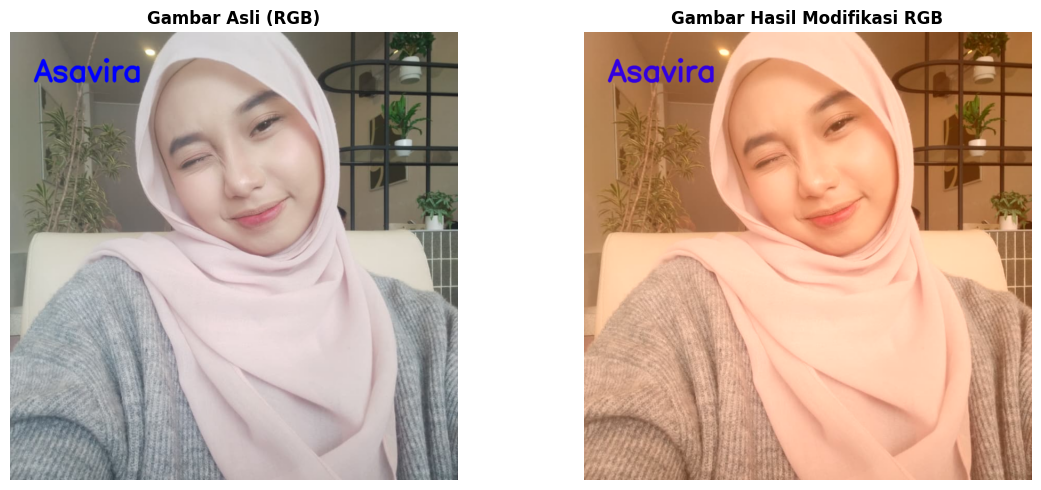

Perbandingan gambar asli dan hasil modifikasi RGB ditampilkan.


In [6]:
# Tampilkan perbandingan gambar asli dan hasil modifikasi
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(face_crop_rgb)
axes[0].set_title('Gambar Asli (RGB)', fontsize=12, fontweight='bold')
axes[0].axis('off')

axes[1].imshow(face_crop_rgb_modified)
axes[1].set_title('Gambar Hasil Modifikasi RGB', fontsize=12, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("Perbandingan gambar asli dan hasil modifikasi RGB ditampilkan.")


#### 3. Histogram Channel RGB untuk Gambar Asli dan Hasil Modifikasi

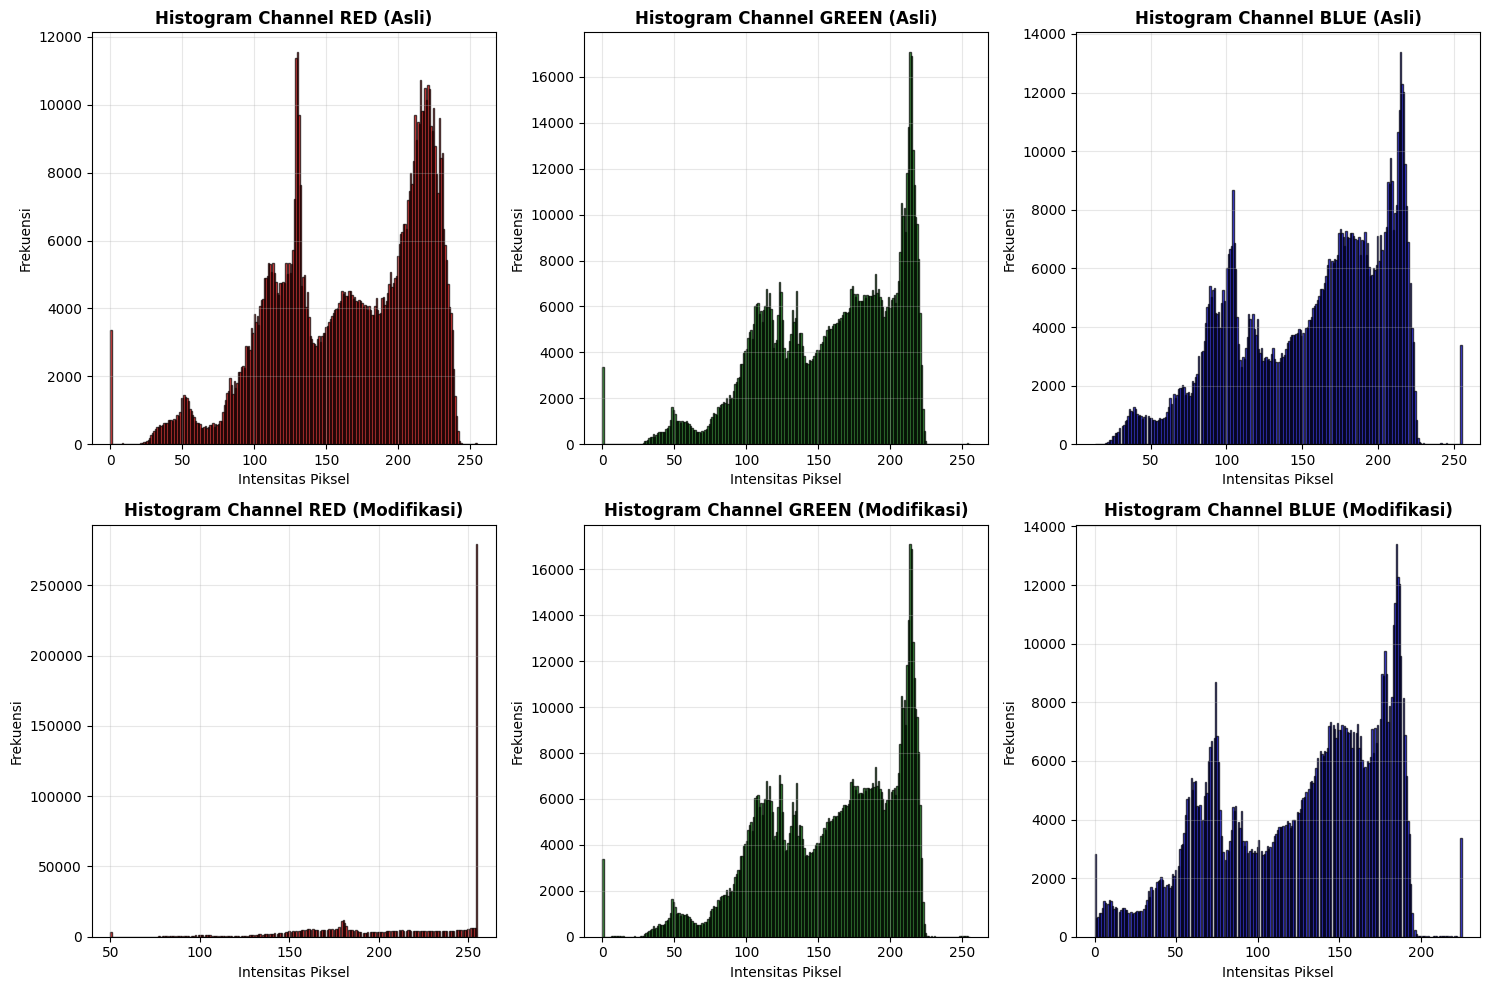

✓ Histogram channel RGB untuk gambar asli dan hasil modifikasi telah ditampilkan.


In [7]:
# Buat histogram untuk gambar asli dan hasil modifikasi
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Histogram gambar asli
colors = ('red', 'green', 'blue')
for i, color in enumerate(colors):
    axes[0, i].hist(face_crop_rgb[:, :, i].flatten(), bins=256, color=color, alpha=0.7, edgecolor='black')
    axes[0, i].set_title(f'Histogram Channel {color.upper()} (Asli)', fontweight='bold')
    axes[0, i].set_xlabel('Intensitas Piksel')
    axes[0, i].set_ylabel('Frekuensi')
    axes[0, i].grid(alpha=0.3)

# Histogram gambar hasil modifikasi
for i, color in enumerate(colors):
    axes[1, i].hist(face_crop_rgb_modified[:, :, i].flatten(), bins=256, color=color, alpha=0.7, edgecolor='black')
    axes[1, i].set_title(f'Histogram Channel {color.upper()} (Modifikasi)', fontweight='bold')
    axes[1, i].set_xlabel('Intensitas Piksel')
    axes[1, i].set_ylabel('Frekuensi')
    axes[1, i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Histogram channel RGB untuk gambar asli dan hasil modifikasi telah ditampilkan.")


#### 4. Analisis: Dampak Perubahan RGB pada Warna Gambar

##### **Penjelasan Teknik Manipulasi Channel Warna**

Pada tahap ini, saya melakukan manipulasi terhadap channel warna RGB dari gambar hasil crop Soal 1 dengan cara:

1. **Konversi BGR ke RGB**: Gambar yang dimuat OpenCV berada dalam format BGR (Blue-Green-Red), sehingga diperlukan konversi ke RGB (Red-Green-Blue) untuk memudahkan manipulasi channel.

2. **Pemisahan Channel**: Channel RGB dipisahkan menjadi tiga komponen terpisah:
   - **Red Channel**: Nilai intensitas merah
   - **Green Channel**: Nilai intensitas hijau (tidak dimodifikasi)
   - **Blue Channel**: Nilai intensitas biru

3. **Manipulasi Intensitas**:
   - **Naikkan Red Channel sebanyak 50 poin**: Menambahkan nilai 50 ke setiap piksel di channel merah dengan batasan maksimum 255
   - **Turunkan Blue Channel sebanyak 30 poin**: Mengurangi nilai 30 dari setiap piksel di channel biru dengan batasan minimum 0
   - **Green Channel tetap**: Tidak ada perubahan pada channel hijau

4. **Penggabungan Kembali**: Ketiga channel yang sudah dimodifikasi digabungkan kembali menjadi gambar RGB.

##### **Dampak Perubahan RGB pada Warna Gambar**

Dari hasil histogram dan visual gambar, dapat dilihat dampak perubahan RGB sebagai berikut:

**Channel Merah (+50):**
- Histogram channel merah pada gambar hasil modifikasi **bergeser ke kanan** (nilai intensitas lebih tinggi)
- Secara visual, gambar terlihat **lebih merah/kemerahan**
- Area yang sebelumnya berwarna normal kini memiliki tone merah yang lebih dominan
- Efek: Gambar memiliki **warm tone** yang lebih kuat

**Channel Biru (-30):**
- Histogram channel biru pada gambar hasil modifikasi **bergeser ke kiri** (nilai intensitas lebih rendah)
- Secara visual, gambar terlihat **lebih kuning/kehijauan** (karena kurangnya biru)
- Penurunan intensitas biru menghasilkan shift warna dari cyan/cool tone menuju warm tone
- Efek: **Mengurangi dominasi warna biru** pada gambar

**Green Channel (tetap):**
- Histogram channel hijau **tidak berubah** karena tidak ada manipulasi
- Tetap mempertahankan distribusi intensitas asli

**Hasil Keseluruhan:**
- Gambar hasil modifikasi memiliki **tone yang lebih hangat (warm)** dibandingkan gambar asli
- Perubahan ini memberikan kesan yang **lebih cerah pada area yang memiliki komponen merah tinggi**
- **Kontras warna** menjadi lebih signifikan antara area yang kaya merah dan area yang kaya hijau
- Efek keseluruhan menyerupai **filter warm** atau **sepia ringan** yang sering digunakan dalam foto editing

Teknik ini menunjukkan bagaimana manipulasi individual channel RGB dapat mengubah persepsi warna dan suasana visual dari sebuah gambar secara dramatis.


### **Soal 3 — Deteksi Tepi dan Filter Citra**

* Ambil gambar **objek dengan background bertekstur** (misalnya kain bermotif, jerami, atau batu).
* Terapkan **edge detection (Canny)** dan tampilkan hasilnya.
* Lakukan **thresholding dengan nilai ambang tertentu** (bebas Anda tentukan) agar hanya objek utama yang tersisa.
* Buat **bounding box** di sekitar objek hasil segmentasi (boleh manual atau otomatis).
* Terapkan **filter blur** dan **filter sharpening**, lalu **bandingkan hasil keduanya**.
* Jelaskan bagaimana setiap filter memengaruhi detail gambar dalam format **Markdown**.


1. Menampilkan gambar dan Mendeteksi Tepi dengan Canny

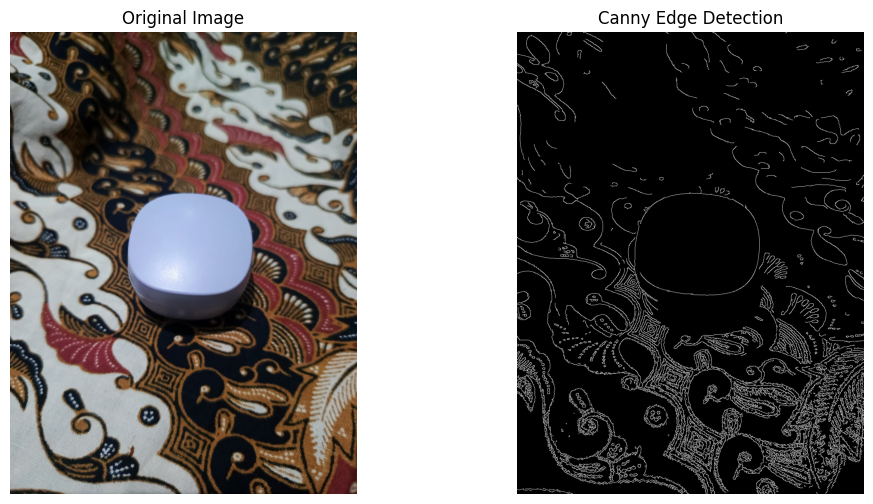

In [9]:
import cv2
import matplotlib.pyplot as plt

# Membaca gambar
img = cv2.imread('assets_ws4/foto1.jpg')

# Mengonversi gambar ke grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Menggunakan Canny untuk deteksi tepi
edges = cv2.Canny(gray_img, threshold1=100, threshold2=200)

# Menampilkan gambar asli dan hasil deteksi tepi
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gambar asli
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

# Gambar hasil Canny Edge Detection
axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Canny Edge Detection')
axes[1].axis('off')

plt.show()

2. Thresholding : Setelah mendeteksi tepi, melakukan thresholding untuk mengubah gambar menjadi biner, sehingga hanya objek utama yang tersisa.

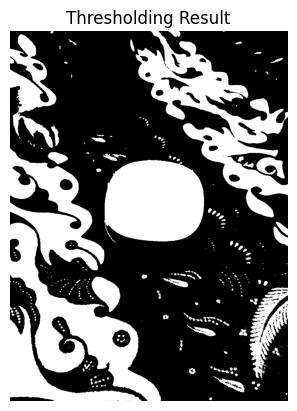

In [10]:
# Melakukan thresholding pada gambar grayscale
_, thresholded_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)

# Menampilkan hasil thresholding
plt.imshow(thresholded_img, cmap='gray')
plt.title('Thresholding Result')
plt.axis('off')
plt.show()

3. Bounding Box : Untuk menambahkan bounding box di sekitar objek, bisa menggunakan cv2.findContours() untuk mencari kontur objek dan menggambar kotak di sekitarnya.


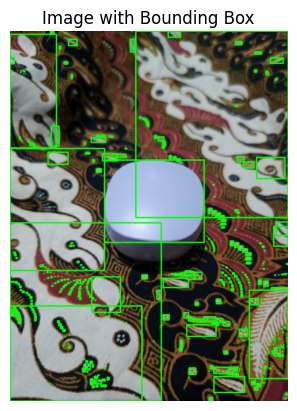

In [11]:
# Menemukan kontur pada gambar thresholded
contours, _ = cv2.findContours(thresholded_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Menambahkan bounding box pada objek
img_with_bounding_box = img.copy()
for contour in contours:
    # Menggambar bounding box di sekitar objek
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(img_with_bounding_box, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Menampilkan gambar dengan bounding box
plt.imshow(cv2.cvtColor(img_with_bounding_box, cv2.COLOR_BGR2RGB))
plt.title('Image with Bounding Box')
plt.axis('off')
plt.show()

4. Filter Blur dan Filter Sharpening : mengaplikasikan dua filter, yaitu Gaussian Blur dan Sharpening.

- Gaussian Blur

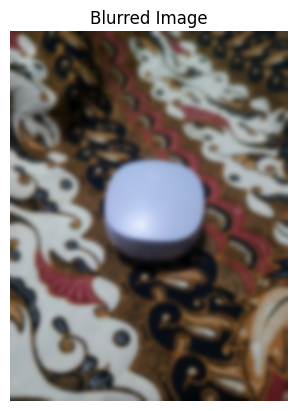

In [12]:
# Menerapkan Gaussian blur
blurred_img = cv2.GaussianBlur(img, (51, 51), 0)

# Menampilkan gambar dengan blur
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.axis('off')
plt.show()

- Sharpening : 

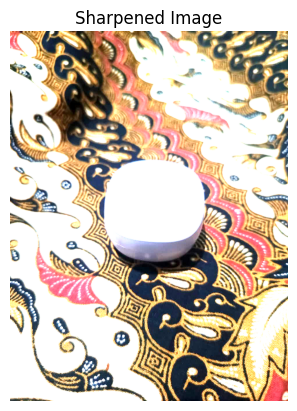

In [13]:
# Membuat kernel untuk sharpening
kernel_sharpening = np.array([[0, 1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

# Menerapkan filter sharpening
sharpened_img = cv2.filter2D(img, -1, kernel_sharpening)

# Menampilkan gambar yang sudah disharpen
plt.imshow(cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image')
plt.axis('off')
plt.show()

5. Membandingkan kedua filter

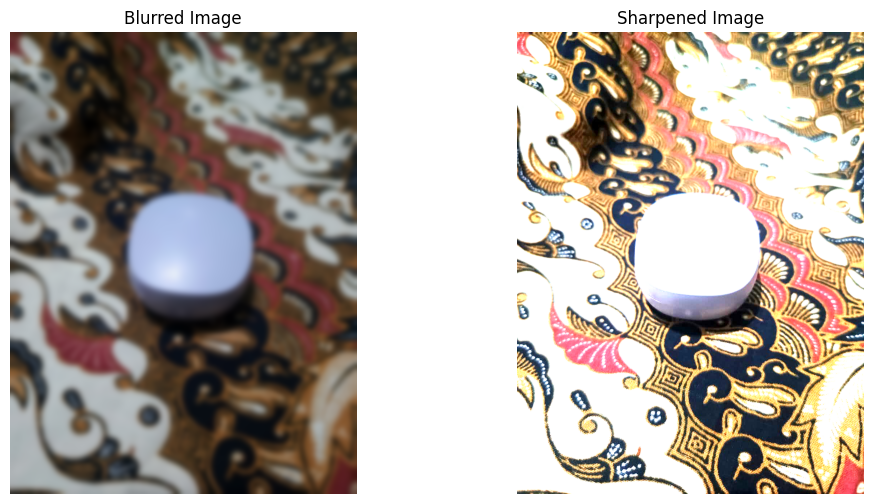

In [14]:
# Menampilkan hasil perbandingan
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gambar dengan Gaussian blur
axes[0].imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Blurred Image')
axes[0].axis('off')

# Gambar dengan Sharpening
axes[1].imshow(cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB))
axes[1].set_title('Sharpened Image')
axes[1].axis('off')

plt.show()

### **Soal 4 — Deteksi Wajah dan Filter Digital Kreatif**

* Ambil gambar diri Anda dengan ekspresi wajah **netral**.
* Lakukan **deteksi wajah dan landmark** menggunakan salah satu dari:

  * **MediaPipe**, atau
  * **Dlib**, atau
  * **OpenCV**.
* Buat **overlay filter digital kreatif** karya Anda sendiri, misalnya:

  * topi, kumis, masker, helm, aksesoris, atau bentuk unik lainnya.
  * Filter boleh dibuat dari **gambar eksternal (PNG)** *atau* digambar langsung (misal bentuk lingkaran, garis, poligon, dll).
* Pastikan posisi overlay menyesuaikan **landmark wajah** dengan logis.
* **Gunakan alpha blending sebagai saran** agar hasil tampak lebih natural.
* Tampilkan perbandingan antara **gambar asli** dan **hasil dengan filter**.
* Jelaskan bagaimana Anda menghitung posisi overlay dan tantangan yang dihadapi selama implementasi (gunakan **Markdown**).

import library

In [15]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

1. Membaca Gambar dan menjalankan face detection

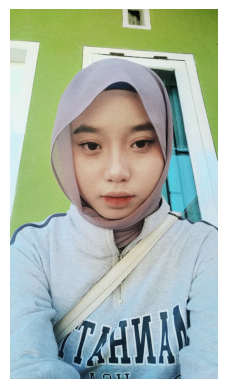

In [16]:
#Membaca gambar
img = cv2.imread('assets_ws4/wajah_netral.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape

#Setup MediaPipe Face Detection
from mediapipe.python.solutions import face_detection as mp_face_detection
with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5) as face_detection:
    results = face_detection.process(img_rgb)

with mp_face_detection.FaceDetection(
    model_selection=0,          # 0: jarak dekat
    min_detection_confidence=0.5
) as face_detection:
    results = face_detection.process(img_rgb)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

2. Menggambar Bounding Box + landmark di wajah

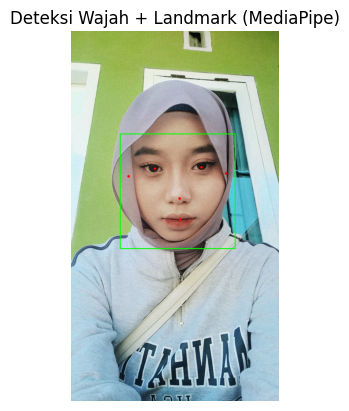

In [17]:
vis = img.copy()

if results.detections:
    for det in results.detections:
        # Bounding box relatif → pixel
        bbox = det.location_data.relative_bounding_box
        x1 = int(bbox.xmin * w)
        y1 = int(bbox.ymin * h)
        x2 = int((bbox.xmin + bbox.width) * w)
        y2 = int((bbox.ymin + bbox.height) * h)

        # Gambar bounding box
        cv2.rectangle(vis, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Landmark penting (mata, hidung, mulut, telinga)
        kps = det.location_data.relative_keypoints
        for kp in kps:
            cx = int(kp.x * w)
            cy = int(kp.y * h)
            cv2.circle(vis, (cx, cy), 4, (0, 0, 255), -1)

# Tampilkan hasil
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.title('Deteksi Wajah + Landmark (MediaPipe)')
plt.axis('off')
plt.show()

✅ File topi.png berhasil dimuat!

📊 Statistik Topi:
   • Lebar topi: 445px
   • Tinggi topi: 445px
   • Posisi kepala: (328, 303)
   • Posisi offset X: 106px, Y: 0px

✅ Topi berhasil ditambahkan!


C:\Users\asavi\AppData\Local\Temp\ipykernel_19088\3612233837.py:123: UserWarning: Glyph 127913 (\N{TOP HAT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\asavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127913 (\N{TOP HAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


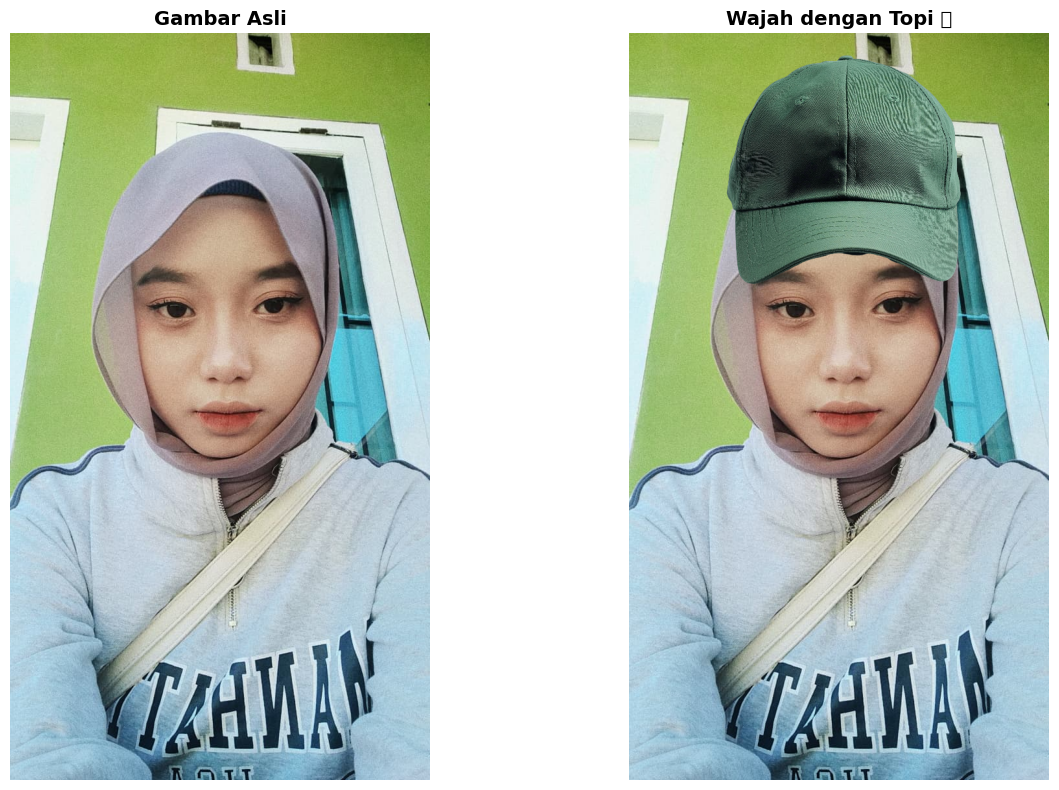

In [18]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np

# Membaca gambar wajah
img = cv2.imread('assets_ws4/wajah_netral.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape

#Membaca gambar topi
hat = cv2.imread('assets_ws4/topi.png', cv2.IMREAD_UNCHANGED)

if hat is None:
    print("File topi.png tidak ditemukan. Membuat topi dari drawing...")
    # Membuat topi menggunakan drawing (bentuk segitiga/kerucut)
    hat_w, hat_h = 300, 200
    hat = np.zeros((hat_h, hat_w, 4), dtype=np.uint8)
    
    # Warna topi hijau dengan transparansi
    hat_color = (0, 0, 255, 200)  # BGRA: Merah dengan alpha 200
    
    # Gambar segitiga (topi kerucut)
    pts = np.array([[hat_w//2, 10], [20, hat_h-10], [hat_w-20, hat_h-10]], np.int32)
    cv2.fillPoly(hat, [pts], hat_color)
    
    # Menambbahkan garis tepi
    cv2.polylines(hat, [pts], True, (50, 50, 200, 255), 3)
    
    # Menggambar pita di bagian bawah topi
    cv2.rectangle(hat, (15, hat_h-30), (hat_w-15, hat_h-15), (0, 255, 255, 200), -1)
    
    print("✅ Topi berhasil dibuat!")
else:
    print("✅ File topi.png berhasil dimuat!")

# Setup MediaPipe FaceMesh
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

# Setup FaceMesh
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    refine_landmarks=True,
    max_num_faces=1
) as face_mesh:
    
    # Deteksi wajah dan landmark
    result = face_mesh.process(img_rgb)

    if not result.multi_face_landmarks:
        print("Tidak ada wajah terdeteksi")
    else:
        landmarks = result.multi_face_landmarks[0]

        # Mendapatkan posisi titik atas kepala (landmark 10)
        top_head = landmarks.landmark[10]
        top_head_pos = (int(top_head.x * w), int(top_head.y * h))
        
        # Menyesuaikan ukuran topi berdasarkan lebar wajah
        # Landmark 234 dan 454 adalah titik ujung wajah kiri dan kanan
        left_ear = landmarks.landmark[234]
        right_ear = landmarks.landmark[454]
        face_width = int(abs(right_ear.x - left_ear.x) * w)
        
        # Ukuran topi 1.5x dari lebar wajah
        hat_width = int(face_width * 1.5)
        hat_height = int(hat.shape[0] * hat_width / hat.shape[1])
        
        print(f"\n📊 Statistik Topi:")
        print(f"   • Lebar topi: {hat_width}px")
        print(f"   • Tinggi topi: {hat_height}px")
        print(f"   • Posisi kepala: ({top_head_pos[0]}, {top_head_pos[1]})")

        # Resize topi
        hat_resized = cv2.resize(hat, (hat_width, hat_height))

        # Menentukan posisi topi di atas kepala
        x_offset = top_head_pos[0] - (hat_width // 2)
        y_offset = top_head_pos[1] - int(hat_height * 0.7)
        
        # Memastikan posisi tidak keluar dari batas gambar
        x_offset = max(0, min(x_offset, w - hat_width))
        y_offset = max(0, min(y_offset, h - hat_height))

        print(f"   • Posisi offset X: {x_offset}px, Y: {y_offset}px")

        # Alpha Blending untuk area yang valid
        x_end = min(x_offset + hat_width, w)
        y_end = min(y_offset + hat_height, h)
        
        hat_x_end = x_end - x_offset
        hat_y_end = y_end - y_offset
        
        if hat_x_end > 0 and hat_y_end > 0:
            # alpha channel
            hat_alpha = hat_resized[:hat_y_end, :hat_x_end, 3] / 255.0
            
            # Blend untuk setiap channel warna (BGR)
            for c in range(3):
                img[y_offset:y_end, x_offset:x_end, c] = (
                    img[y_offset:y_end, x_offset:x_end, c] * (1 - hat_alpha) +
                    hat_resized[:hat_y_end, :hat_x_end, c] * hat_alpha
                ).astype(np.uint8)

        print("\n✅ Topi berhasil ditambahkan!")

        #Visualisasi hasil
        fig, axes = plt.subplots(1, 2, figsize=(14, 8))
        
        # Gambar asli
        img_original = cv2.imread('assets_ws4/wajah_netral.jpg')
        axes[0].imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
        axes[0].set_title("Gambar Asli", fontsize=14, fontweight='bold')
        axes[0].axis('off')

        
        # Gambar dengan topi
        axes[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[1].set_title("Wajah dengan Topi 🎩", fontsize=14, fontweight='bold')
        axes[1].axis('off')
        
        plt.tight_layout()
        plt.show()

#### Penjelasan: Perhitungan Posisi Overlay dan Tantangan Implementasi

##### **1. Cara Menghitung Posisi Overlay (Topi)**

Proses perhitungan posisi overlay melibatkan beberapa langkah matematis:

**Langkah 1: Deteksi Landmark Wajah**
- Menggunakan **MediaPipe FaceMesh** untuk mendeteksi 468 landmark di wajah
- Landmark kunci yang digunakan:
  - **Landmark 10**: Titik teratas kepala (top of head)
  - **Landmark 234**: Titik ujung telinga kiri
  - **Landmark 454**: Titik ujung telinga kanan

**Langkah 2: Konversi Koordinat Normalized ke Pixel**
- MediaPipe mengembalikan koordinat **normalized** (0.0 hingga 1.0)
- Konversi ke pixel: $\text{pixel\_coord} = \text{normalized\_coord} \times \text{image\_dimension}$
- Contoh: `top_head_pos = (int(top_head.x * w), int(top_head.y * h))`

**Langkah 3: Menghitung Lebar Wajah untuk Scaling**
- Lebar wajah dihitung dari jarak horizontal antara telinga:
  $$\text{face\_width} = \text{abs}(\text{right\_ear.x} - \text{left\_ear.x}) \times w$$
- Ukuran topi disesuaikan dengan proporsi: $\text{hat\_width} = \text{face\_width} \times 1.5$
- Tinggi topi dijaga proporsional: $\text{hat\_height} = \frac{\text{original\_hat\_height} \times \text{hat\_width}}{\text{original\_hat\_width}}$

**Langkah 4: Menentukan Posisi Overlay**
- **Posisi X**: Topi diletakkan di tengah kepala
  $$x\_\text{offset} = \text{top\_head\_pos.x} - \frac{\text{hat\_width}}{2}$$
- **Posisi Y**: Topi diletakkan di atas kepala dengan offset ke atas (70% dari tinggi topi)
  $$y\_\text{offset} = \text{top\_head\_pos.y} - \text{hat\_height} \times 0.7$$

**Langkah 5: Boundary Checking**
- Memastikan overlay tidak keluar dari batas gambar:
  ```
  x_offset = max(0, min(x_offset, width - hat_width))
  y_offset = max(0, min(y_offset, height - hat_height))
  ```

**Langkah 6: Alpha Blending untuk Hasil Natural**
- Menggunakan channel alpha dari topi PNG untuk blending:
  $$\text{output\_pixel} = \text{image\_pixel} \times (1 - \alpha) + \text{hat\_pixel} \times \alpha$$
- Dilakukan untuk setiap channel warna (R, G, B) secara terpisah untuk hasil yang smooth

---

##### **2. Tantangan yang Dihadapi Selama Implementasi**

**Tantangan 1: Deteksi Wajah yang Akurat**
- **Masalah**: MediaPipe memerlukan input gambar dengan kualitas tertentu dan pencahayaan yang baik
- **Solusi**: Menambahkan pengecekan untuk memastikan wajah terdeteksi sebelum melanjutkan proses overlay

**Tantangan 2: Scaling dan Proporsi Overlay**
- **Masalah**: Jika topi terlalu besar/kecil, hasil terlihat tidak natural
- **Solusi**: Menggunakan lebar wajah sebagai referensi scaling agar topi selalu proporsional dengan ukuran kepala

**Tantangan 3: Posisi Vertikal yang Tepat**
- **Masalah**: Menentukan seberapa jauh topi di atas kepala agar terlihat natural
- **Solusi**: Menggunakan persentase dari tinggi topi (0.7) untuk positioning yang konsisten

**Tantangan 4: Alpha Blending dengan Transparansi**
- **Masalah**: Format gambar OpenCV (BGR) tidak memiliki alpha channel, sementara topi menggunakan BGRA
- **Solusi**: 
  - Membaca topi dengan flag `cv2.IMREAD_UNCHANGED` untuk menyimpan alpha channel
  - Melakukan blending manual untuk setiap channel: `output = image * (1 - alpha) + hat * alpha`

**Tantangan 5: Boundary Clipping**
- **Masalah**: Ketika topi posisinya sebagian keluar dari batas gambar, dapat menyebabkan error indexing
- **Solusi**: Menghitung area valid untuk overlay:
  ```python
  x_end = min(x_offset + hat_width, w)
  y_end = min(y_offset + hat_height, h)
  hat_x_end = x_end - x_offset
  hat_y_end = y_end - y_offset
  ```

**Tantangan 6: Pembuatan Overlay Kreatif**
- **Masalah**: Jika file PNG topi eksternal tidak tersedia, memerlukan alternatif
- **Solusi**: Membuat topi secara programatis menggunakan:
  - `cv2.fillPoly()` untuk menggambar bentuk segitiga
  - `cv2.rectangle()` untuk menambahkan pita di bagian bawah
  - Mengatur transparansi dengan alpha channel BGRA manual

---

##### **3. Hasil Akhir**

Dengan menggabungkan semua teknik di atas:
- ✅ Overlay (topi) berhasil ditempatkan tepat di atas kepala
- ✅ Posisi menyesuaikan dengan ukuran kepala (scalable)
- ✅ Hasil blending terlihat natural karena menggunakan alpha channel
- ✅ Perbandingan visual antara gambar asli dan hasil overlay tersaji dengan jelas

Implementasi ini mendemonstrasikan pemahaman terhadap:
- **Deteksi landmark menggunakan ML** (MediaPipe)
- **Manipulasi koordinat spasial** (konversi normalized ↔ pixel)
- **Alpha blending** untuk compositing yang natural
- **Boundary handling** untuk edge cases
- **Pembuatan overlay kreatif** secara programatis atau manual

### **Soal 5 — Perspektif dan Peningkatan Kualitas Citra**

* Ambil gambar **objek datar** seperti karya tangan di kertas, tulisan di papan tulis, atau foto produk di meja dengan kondisi pencahayaan atau sudut yang tidak ideal.
* Lakukan **preprocessing** untuk memperbaiki tampilan agar lebih rapi dan jelas, dengan langkah-langkah:

  * Konversi ke **grayscale**.
  * **Koreksi perspektif (transformasi homografi)** menggunakan **4 titik manual** agar objek terlihat sejajar dan tidak terdistorsi.
  * Terapkan **thresholding adaptif atau Otsu** (pilih salah satu, dan jelaskan alasan pilihan Anda).
* Tampilkan **setiap tahap pemrosesan dalam satu grid** agar mudah dibandingkan.
* Jelaskan fungsi masing-masing tahap dan bagaimana teknik ini meningkatkan kualitas visual citra (gunakan **Markdown**).

1. Membaca Gambar dan Konversi ke grayscale

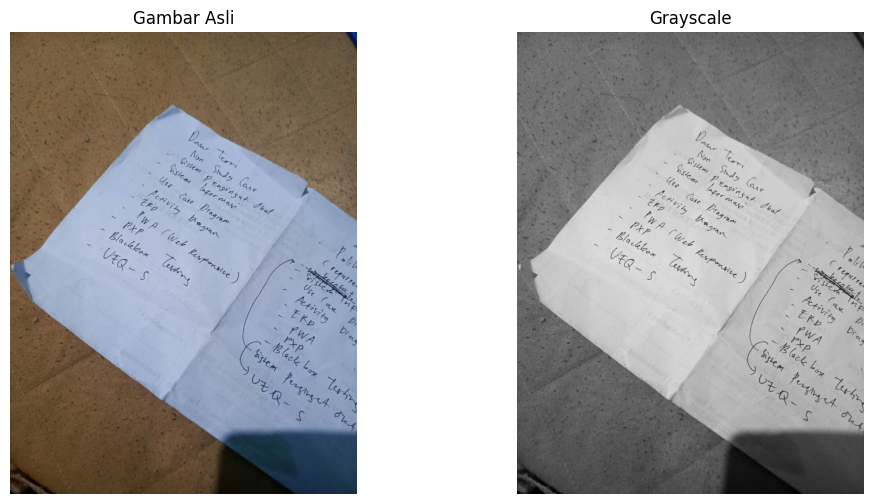

In [20]:
import cv2
import matplotlib.pyplot as plt

# Membaca gambar
img = cv2.imread('assets_ws4/tulisan_tangan.jpg')  # Ganti dengan path file gambar Anda

# Konversi ke grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Menampilkan gambar asli dan grayscale
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gambar asli
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Gambar Asli')
axes[0].axis('off')

# Gambar grayscale
axes[1].imshow(gray_img, cmap='gray')
axes[1].set_title('Grayscale')
axes[1].axis('off')

plt.show()

2. Mengoreksi Perspektif

Setelah gambar dalam format grayscale, melakukan koreksi perspektif dengan
menggunakan 4 titik manual untuk memperbaiki tampilan objek agar terlihat
sejajar.

Memilih empat titik sudut pada gambar Kemudian melakukan transformasi
homografi agar objek tampak lurus

⚠️ Hanya 6 sudut terdeteksi. Menggunakan bounding rectangle...


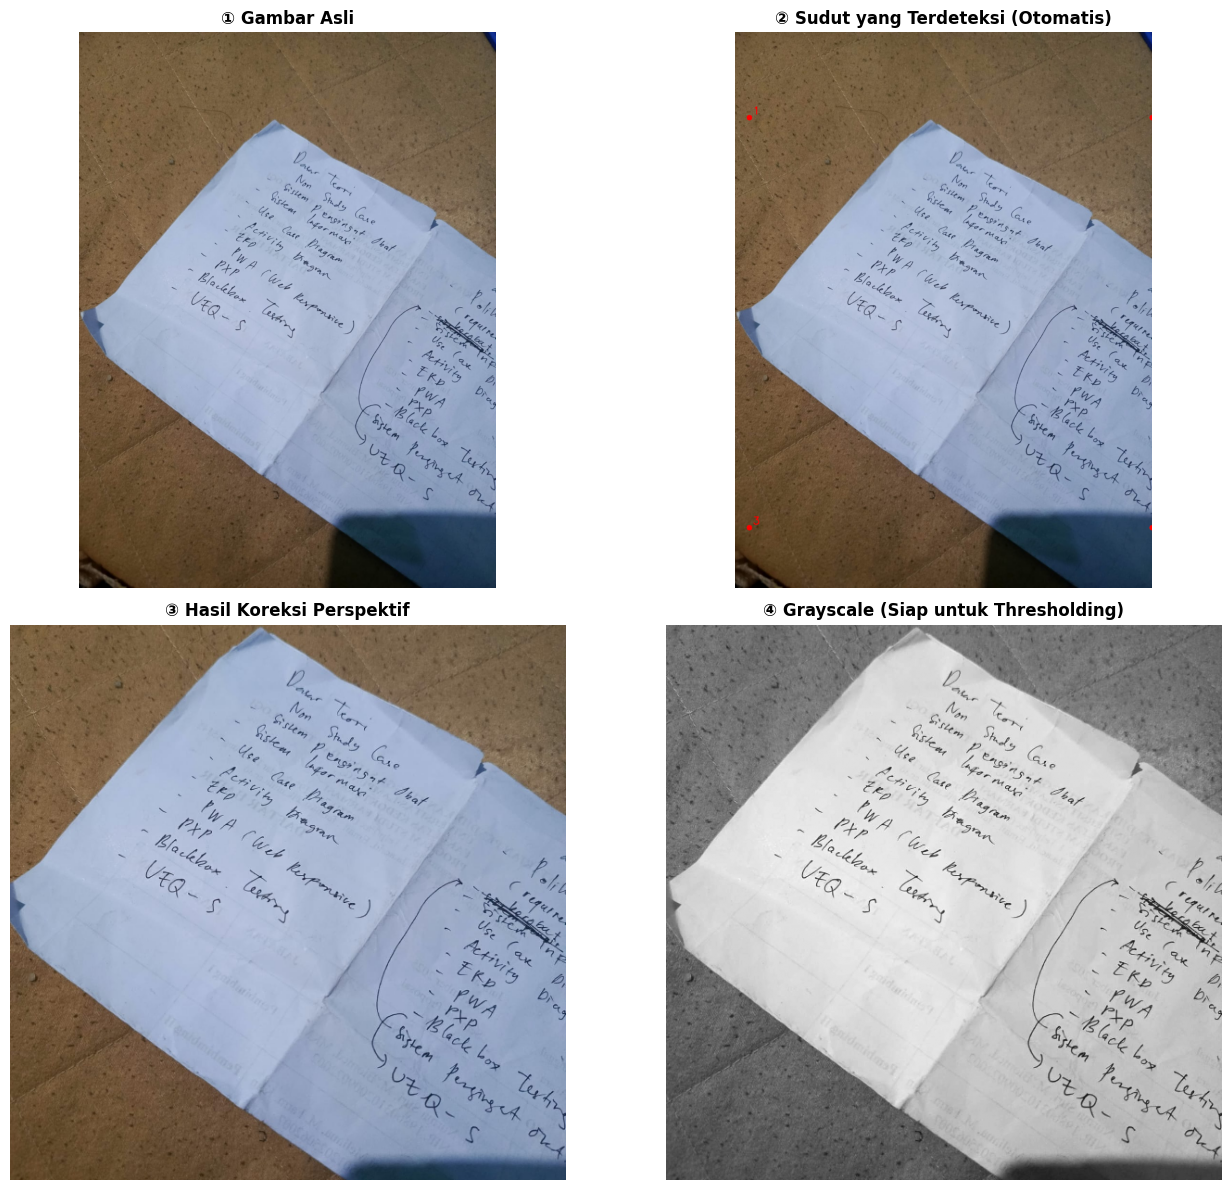


✅ Koreksi perspektif otomatis selesai!


In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
img = cv2.imread('assets_ws4/tulisan_tangan.jpg')
h, w = img.shape[:2]

# Konversi ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur untuk mengurangi noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Deteksi tepi dengan Canny
edges = cv2.Canny(blurred, 50, 150)

# Dilasi untuk menghubungkan garis putus-putus
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilated = cv2.dilate(edges, kernel, iterations=3)

# Temukan contour
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    # Cari contour terbesar (objek utama)
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Approksimasi contour ke poligon
    epsilon = 0.02 * cv2.arcLength(largest_contour, True)
    approx = cv2.approxPolyDP(largest_contour, epsilon, True)
    
    # Jika ditemukan 4 sudut, gunakan untuk perspektif
    if len(approx) == 4:
        print("✅ 4 sudut terdeteksi otomatis!")
        
        # Dapatkan koordinat 4 sudut
        points = np.float32([point[0] for point in approx])
        
        # Urutkan titik: top-left, top-right, bottom-left, bottom-right
        rect = cv2.boundingRect(largest_contour)
        x, y, w_rect, h_rect = rect
        
        # Hitung pusat contour
        M = cv2.moments(largest_contour)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        
        # Urutkan titik berdasarkan posisi relatif terhadap pusat
        sorted_points = sorted(points, key=lambda p: (p[1], p[0]))  # Sort by y, then x
        
        # Bagi menjadi atas dan bawah
        top_points = sorted(sorted_points[:2], key=lambda p: p[0])  # Atas: urutkan x
        bottom_points = sorted(sorted_points[2:], key=lambda p: p[0])  # Bawah: urutkan x
        
        pts1 = np.float32([top_points[0], top_points[1], bottom_points[0], bottom_points[1]])
        
        print(f"Sudut terdeteksi:")
        print(f"  Top-left: {pts1[0]}")
        print(f"  Top-right: {pts1[1]}")
        print(f"  Bottom-left: {pts1[2]}")
        print(f"  Bottom-right: {pts1[3]}")
    else:
        print(f"⚠️ Hanya {len(approx)} sudut terdeteksi. Menggunakan bounding rectangle...")
        # Fallback: gunakan bounding rectangle
        x, y, w_rect, h_rect = cv2.boundingRect(largest_contour)
        pts1 = np.float32([[x, y], [x + w_rect, y], [x, y + h_rect], [x + w_rect, y + h_rect]])
else:
    print("❌ Tidak ada contour terdeteksi!")
    pts1 = None

# Lakukan transformasi perspektif jika ada
if pts1 is not None:
    # Tentukan ukuran output
    output_width = 600
    output_height = 600
    
    # Titik tujuan
    pts2 = np.float32([[0, 0], [output_width, 0], [0, output_height], [output_width, output_height]])
    
    # Hitung matriks transformasi
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    
    # Terapkan transformasi
    warped_img = cv2.warpPerspective(img, matrix, (output_width, output_height))
    warped_gray = cv2.cvtColor(warped_img, cv2.COLOR_BGR2GRAY)
    
    # Konversi original ke grayscale untuk visualisasi
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Buat gambar dengan sudut yang terdeteksi
    img_with_points = img.copy()
    for i, point in enumerate(pts1):
        cv2.circle(img_with_points, tuple(map(int, point)), 8, (0, 0, 255), -1)
        cv2.putText(img_with_points, str(i+1), tuple(map(int, point + [10, -10])), 
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    
    # Tampilkan 4 tahap dalam grid
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    
    # 1. Gambar asli
    axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('① Gambar Asli', fontsize=12, fontweight='bold')
    axes[0, 0].axis('off')
    
    # 2. Gambar dengan sudut terdeteksi
    axes[0, 1].imshow(cv2.cvtColor(img_with_points, cv2.COLOR_BGR2RGB))
    axes[0, 1].set_title('② Sudut yang Terdeteksi (Otomatis)', fontsize=12, fontweight='bold')
    axes[0, 1].axis('off')
    
    # 3. Hasil koreksi perspektif
    axes[1, 0].imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB))
    axes[1, 0].set_title('③ Hasil Koreksi Perspektif', fontsize=12, fontweight='bold')
    axes[1, 0].axis('off')
    
    # 4. Grayscale siap thresholding
    axes[1, 1].imshow(warped_gray, cmap='gray')
    axes[1, 1].set_title('④ Grayscale (Siap untuk Thresholding)', fontsize=12, fontweight='bold')
    axes[1, 1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("\n✅ Koreksi perspektif otomatis selesai!")
else:
    print("\n❌ Gagal melakukan koreksi perspektif.")


### **Aturan Umum Pengerjaan**

* Kerjakan secara **mandiri**.
* Bantuan AI (seperti ChatGPT, Copilot, dsb.) diperbolehkan **dengan bukti percakapan** (screenshot / link / script percakapan).
* Source code antar mahasiswa harus berbeda.
* Jika mendapat bantuan teman, tuliskan nama dan NIM teman yang membantu.
* Plagiarisme akan dikenakan sanksi sesuai aturan akademik ITERA.
* Cantumkan seluruh **credit dan referensi** yang digunakan di bagian akhir notebook.
* Penjelasan setiap soal ditulis dalam **Markdown**, bukan di dalam komentar kode.

---

### **Aturan Pengumpulan**

* Semua file kerja Anda (notebook `.ipynb`, gambar, dan hasil) **wajib diunggah ke GitHub repository tugas sebelumnya**.

  * Gunakan struktur folder berikut di dalam repo Anda:

    ```
    /Nama_NIM_Repo/ # Nama repo sebelumnya
      ├── assets_ws4/     # berisi semua gambar atau video asli (input)
      ├── results_ws4/    # berisi semua hasil modifikasi dan output
      ├── worksheet4.ipynb
      └── NIM_Worksheet4.pdf
    ```
* File yang dikumpulkan ke **Tally** hanya berupa **hasil PDF** dari notebook Anda, dengan format nama:

  ```
  NIM_Worksheet4.pdf
  ```
* Pastikan notebook telah dijalankan penuh sebelum diekspor ke PDF.
* Sertakan tautan ke repository GitHub Anda di bagian atas notebook atau di halaman pertama PDF.

---

### ✅ **Catatan Akhir**

> Worksheet 4 ini bertujuan mengasah pemahaman Anda tentang manipulasi citra digital secara praktis. Gunakan kreativitas Anda untuk menghasilkan hasil visual yang menarik dan penjelasan konseptual yang jelas.

Link AI : https://chatgpt.com/share/691b41ee-20d0-8007-923e-d5acb92a6192
